In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [21]:
df = pd.read_csv('epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


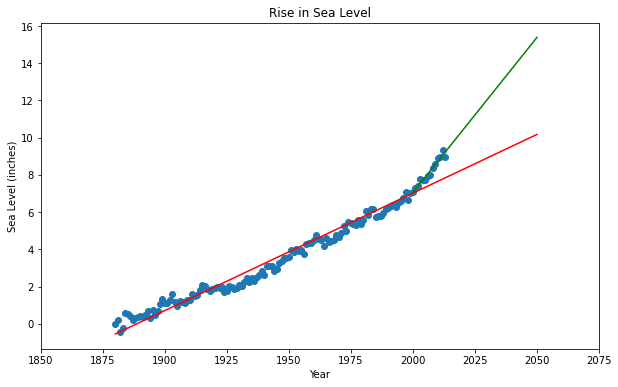

In [22]:
# Create scatter plot of dataframe
x1 = df['Year']
y1 = df['CSIRO Adjusted Sea Level']
plt.figure(figsize=(10, 6))
plt.scatter(x1, y1)

# Get eq of linear regression from 1880 - 2050
(slope1, y_int1, r, p, stderr, ) = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
x_regress1 = range(1880, 2051, 1)
y_regress1 = slope1 * x_regress1 + y_int1
plt.plot(x_regress1, y_regress1, color='r')

# Get eq of linear regression from 2000 - 2050
(slope2, y_int2, r2, p2, stderr2, ) = linregress(df[df['Year'] >= 2000][['Year', 'CSIRO Adjusted Sea Level']])
x_regress2 = range(2000, 2051, 1)
y_regress2 = slope2 * x_regress2 + y_int2
plt.plot(x_regress2, y_regress2, color='g')

# Set params for output
plt.xlim(right=2050)
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.xticks(range(1850, 2076, 25))
plt.show()